#### create a program to download stock data from yahoo

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import time
from datetime import datetime, timedelta

In [12]:
# define dates
today = datetime.today()
thirty_days_ago = today - timedelta(days=2)

end = today.strftime("%Y-%m-%d")
st = thirty_days_ago.strftime("%Y-%m-%d")

st, end

('2022-04-22', '2022-04-24')

In [13]:
# all tickers
tk = pd.read_pickle("../data/all_tickers.pkl")
print (tk.shape)

(8464, 12)


In [18]:
def gettk (tk):
    tmp = yf.Ticker(tk)
    tmp = tmp.history(start = st, end = end, interval = '1d')
    
    tmp.drop(['Open', 'High', 'Low'], axis = 1, inplace = True)       
    tmp['Ticker'] = tk.upper()
    
    tmp['pctchg'] = tmp['Close'].pct_change()
    tmp.loc[tmp['pctchg'] >= 0, 'chgtyp'] = 1
    tmp['chgtyp'].fillna(0, inplace = True)

    tmp['d5avg'] = tmp['chgtyp'].rolling(5).mean()
    tmp['d10avg'] = tmp['chgtyp'].rolling(10).mean()
    tmp['d15avg'] = tmp['chgtyp'].rolling(15).mean()
    tmp['d20avg'] = tmp['chgtyp'].rolling(20).mean()
    
    tmp.reset_index(inplace = True)

    return tmp

In [48]:
# create an empty dataframe
all = gettk(tk = 'aapl')
all = all.iloc[:0,:].copy(deep = True)
# all.reset_index(inplace=True)
all

,Date,Close,Volume,Dividends,Stock Splits,Ticker,pctchg,chgtyp,d5avg,d10avg,d15avg,d20avg


In [49]:
tk0 = tk['symbol'].to_list()
#tk0 = tk['symbol'].to_list()
# remove non-conventional tickers
tk0 = [x for x in tk0 if (x.find("^")== -1 and x.find('/')==-1 and len(x)<5)]
#print (tk0)
len(tk0)

6707

In [50]:
# split tk0 into 6 smaller lists for easy processing
x = 1200
final_list = lambda test_list, x: [test_list[i:i+x] for i in range(0, len(test_list), x)]
output = final_list(tk0, x)

In [51]:
output[0][0:10]

['A', 'AA', 'AAC', 'AACG', 'AACI', 'AADI', 'AAIC', 'AAIN', 'AAL', 'AAMC']

In [52]:
len(output)

6

In [53]:
# loop over tk
all0 = all.copy(deep = True)
for i in output[0]:
    try:
        new = gettk(tk = i)
        all0 = all0.append(new)
    except Exception:
        pass

In [54]:
all0.shape

(1218, 12)

In [56]:
def loops(dfout , id):
    dfout = all.copy(deep = True)
    for i in output[id]:
        try:
            new = gettk(tk = i)
            dfout = dfout.append(new)
        except Exception:
            pass

In [58]:
loops(dfout = 'all1', id = 1)

- EAI: No data found for this date range, symbol may be delisted
- EMP: No data found for this date range, symbol may be delisted


In [ ]:
loops(dfout = 'all2', id = 2)
loops(dfout = 'all3', id = 3)
loops(dfout = 'all4', id = 4)
loops(dfout = 'all5', id = 5)

- RCA: No data found for this date range, symbol may be delisted
- SFB: No data found for this date range, symbol may be delisted


In [69]:
'all'+ str(2) = all.copy(deep = True)

SyntaxError: cannot assign to operator (<ipython-input-69-3f20ba0e5c90>, line 1)

In [68]:
new

,Date,Close,Volume,Dividends,Stock Splits,Ticker,pctchg,chgtyp,d5avg,d10avg,d15avg,d20avg


In [ ]:
def loops2(id):
    np.str('all'+id) = all.copy(deep = True)
    for i in output[id]:
        try:
            new = gettk(tk = i)
            dfout = dfout.append(new)
        except Exception:
            pass

In [34]:
try:
    gettk(tk = 'AAPL')
    all = all.append(new)
except Exception:
    pass

- ADSEW: No data found for this date range, symbol may be delisted


In [35]:
all.shape

(283, 12)

In [90]:
all.shape

(170, 10)

In [ ]:
a['pctchg'] = a['Close'].pct_change()

a.loc[aapl['pctchg'] >= 0, 'chgtyp'] = 1
aapl['chgtyp'].fillna(0, inplace = True)

# aapl.groupby('Dividends')
aapl['d5avg'] = aapl['chgtyp'].rolling(5).mean()
aapl['d10avg'] = aapl['chgtyp'].rolling(10).mean()
aapl['d15avg'] = aapl['chgtyp'].rolling(15).mean()
aapl['d20avg'] = aapl['chgtyp'].rolling(20).mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-25,173.880005,175.279999,172.750000,174.720001,80546200,0,0
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900,0,0
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400,0,0
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0,0
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0,0
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0,0
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0,0
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0,0
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0,0


In [28]:
# get history data
aapl = aapl.history(start = st, end = end, interval = "1d")

AttributeError: 'DataFrame' object has no attribute 'history'

In [14]:
aapl['pctchg'] = aapl['Close'].pct_change()

In [15]:
aapl.loc[aapl['pctchg'] >= 0, 'chgtyp'] = 1
aapl['chgtyp'].fillna(0, inplace = True)

In [16]:
# aapl.groupby('Dividends')
aapl['d5avg'] = aapl['chgtyp'].rolling(5).mean()
aapl['d10avg'] = aapl['chgtyp'].rolling(10).mean()
aapl['d15avg'] = aapl['chgtyp'].rolling(15).mean()
aapl['d20avg'] = aapl['chgtyp'].rolling(20).mean()

In [17]:
aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits,pctchg,chgtyp,d5avg,d10avg,d15avg,d20avg
Date,,,,,,,,,,,,,
2022-03-25,173.880005,175.279999,172.750000,174.720001,80546200,0,0,NaN,0.0,NaN,NaN,NaN,NaN
2022-03-28,172.169998,175.729996,172.000000,175.600006,90371900,0,0,0.005037,1.0,NaN,NaN,NaN,NaN
2022-03-29,176.690002,179.009995,176.339996,178.960007,100589400,0,0,0.019134,1.0,NaN,NaN,NaN,NaN
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0,0,-0.006650,0.0,NaN,NaN,NaN,NaN
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0,0,-0.017776,0.0,0.4,NaN,NaN,NaN
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0,0,-0.001718,0.0,0.4,NaN,NaN,NaN
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0,0,0.023693,1.0,0.4,NaN,NaN,NaN
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0,0,-0.018942,0.0,0.2,NaN,NaN,NaN
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0,0,-0.018451,0.0,0.2,NaN,NaN,NaN


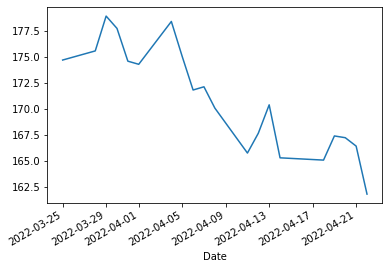

In [18]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the close price of the AAPL
aapl['Close'].plot()
plt.show()